# `Assignment II`

# Introduction

In accordance with the assignment's specifications, we are required to choose a spatial dataset and utilize the data within it to create a dashboard. The dashboard should include an interactive map, along with other interactive elements, using the `panel` library. The objective is to generate a final dashboard that allows end users to interact with it and discover meaningful information. We will begin by selecting the dataset, which in this case is the **Hate Crime Incident** that occurred in the city of Tempe, Arizona, USA[1]. These include crimes motivated by biases related to ethnic origin, religion, sexual orientation, impairment, gender, and gender identity. We will manipulate the data and format it gracefully, allowing them to incorporate spatial data into maps and provide features in dashboards to visualize and analyze data with various attributes in a great way.


In [566]:
#1 hate crime data reference
#2 https://data.gov/about/
#3  https://www.fbi.gov/file-repository/ucr/ucr-2019-1-nibrs-user-manua-093020.pdf 
#4 https://data.tempe.gov/datasets/tempegov::race-and-ethnicity-acs2018-tempe/about

## Selecting the dataset and using its attributes in the map

The above dataset is sourced from **Data.gov**, the official website of the United States government. This website's mission is to use government open data to inform the public, drive creativity and revenue generation, achieve agency missions, and strengthen the foundation of an open and accountable government[2]. The hate crime incident data describes the crimes associated with bias crimes that occurred in the city of Tempe between 2010 and 2023. This includes crimes based on biases such as gender, community target, and individual beliefs. The data's Bias Type categories are derived from the Bias Motivation Categories as defined by the Federal Bureau of Investigation (FBI) National Incident-Based Reporting System (NIBRS) manual[3].

The motivation for using the dataset is to educate both local and government authorities, such as police, as well as the entire Tempe community, about the crimes so that they can be reduced in order to restore peace and harmony to the community by identifying the root cause of these bias crimes. The dataset includes attributes such as the `type of biased crime`, such as for a specific religion or gender, the `victim's race, and the type of offense`, such as verbal abuse, fighting, and so on, as well as the `location where they were victimized`, as well as the `latitude and longitude`. When these characteristics are combined, they produce a broader sense, allowing anyone to learn more about hate crimes. So they can decide whether or not to move to that neighborhood while also taking precautions to ensure their safety. It also helps the police know what types of incidents are common and what are probable places, such as in the market, downtown, or at night, allowing them to identify those links and prevent them from occurring in the first place by regular surveillance.

In [567]:
#Importing libraries
import requests
import pandas as pd
from datetime import datetime

In [568]:
# Function used to fetch data from API and process its feature to make it in the form 
# to use in further process

def fetchAndrPocessData(url):
   
    # GET request to fetch the data from URL
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Convert the data in JSON response 
        data = response.json()
        
        # Extract only the "properties" part as a feature in dataset
        properties_list = []
        for feature in data["features"]:
            properties = feature["properties"]
            # Convert the CrimeDate in a format so we can use it to process.
            crime_date = datetime.utcfromtimestamp(properties["CrimeDate"] / 1000)
            properties["CrimeDate"] = crime_date.strftime('%d/%m/%Y, %H:%M')
            # Extract the year from the CrimeDate and append it as a new column as in the dataset, there is no column for year
            properties["Year"] = crime_date.year
            # If BiasType data is not available, fill it with Not available
            if properties["BiasType"] is None:
              properties["BiasType"] = "Not available"
            properties_list.append(properties)
        
        # Convert the list of properties dictionaries to a DataFrame
        finalData = pd.DataFrame(properties_list)
        
        return finalData
    else:
        print("Failed to fetch data:", response.status_code)
        return None

# Define the URL to fetch data from
url = "https://services.arcgis.com/lQySeXwbBg53XWDi/arcgis/rest/services/hate_crime_open_data/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson"

# Calling function to fetch data
finalData = fetchAndrPocessData(url)

# Display the data if data was fetched successfully
if finalData is not None:
    print("Dataset loaded successfully")


Dataset loaded successfully


In [569]:
finalData.head()


OBJECTID  XCoordinate  YCoordinate               BiasType  VictimCount  \
0         1       684608       867365  Anti-Islamic (Muslim)          3.0   
1         2       703527       878915        Anti-Gay (Male)          1.0   
2         3       698856       878435        Anti-Gay (Male)          1.0   
3         4       693898       882345             Anti-Black          2.0   
4         5       690272       878394  Anti-Islamic (Muslim)          1.0   

          RMSID CrimeStatus      OffenseType  \
0   TE201012640      Active     Intimidation   
1  TE2010132348      Active   Non DV Assault   
2   TE201028029      Active   Non DV Assault   
3   TE201094607      Active     Intimidation   
4  TE2011111420    Inactive  Criminal Damage   

                               Note               LocationType  ...  \
0                              None  Department/Discount Store  ...   
1                              None             Residence/Home  ...   
2                              None        Highway/Road/Street  ...   
3                              None             Residence/Home  ...   
4  Later found to not be bias crime             Residence/Home  ...   

  VictimGender          CrimeDate     ObfuscatedAddress StatusChangeDate  \
0         None  20/01/2010, 07:00  50XX S ARIZONA MILLS             None   
1         None  28/08/2010, 07:00    19XX E APACHE BLVD             None   
2         None  19/02/2010, 07:00    12XX E APACHE BLVD             None   
3         None  15/06/2010, 07:00                  None             None   
4         None  30/06/2011, 07:00     13XX S JUDD ST                None   

      CreateDate       EditDate   Latitude   Longitude  BiasTypeCode  Year  
0  1621960188000  1634329756000  33.384323 -111.967093            24  2010  
1  1621960188000  1634329831000  33.416077 -111.905108            41  2010  
2  1621960188000  1634329781000  33.414758 -111.920416            41  2010  
3  1621960188000  1634329817000  33.425503 -111.936667            12  2010  
4  1621960188000  1634329863000  33.414641 -111.948548            24  2011  

[5 rows x 22 columns]

## Fetching the dataset

The Hate Crime Incident dataset for the City of Tempe, which is provided by the website (Data.GOV), is available in a variety of formats, including `CSV and GeoJSON`. However, for our purposes, we are retrieving the data via the site's API[6] to ensure that we are receiving correct data without the risk of data alteration. The function above demonstrates how we retrieve and manipulate the data. In the dataset, we are primarily interested in fields such as **Type of Bias**, which indicates which type of hate crime the data point represents. The **Type of offense** represents what kind of offense it is, as well as the **Location of the crime**. There are other attributes, such as the victim's race, that are not properly maintained in the dataset. The date of the crime is also an important attribute, but we are also interested in the **year** to see the pattern for each year, so our function retrieves the year from the date. The dataset also includes spatial data. Putting all of the data together allows us to better understand the types of hate crimes that occur in Tempe. Is the number of biassed crimes increasing or decreasing year after year? In which location are the victims most likely to face discrimination, and whether or not these crimes are brutal?

## Plotting Bias Crime data on Interactive Map 

Now we'll start plotting the data points on the map. To make our map interactive, we use the **Folium library**. To plot a point in folium, we use a **marker cluster**.  The benefit of marker clustering is that it groups markers at different zoom levels, which improves map performance and readability, especially when dealing with a large number of markers. We also included a popup that, when clicked, represented the type of bias crime. Emojis are used alongside text to improve readability when displaying popup text. We are also using tiles to create the map base layer.

### Base Map

Folium accepts argument tiles and allows us to add a base map tileset. In this assignment, the tileset was created using MapBox Studio. Mapbox Studio is a web-based application that lets users create and customize maps with a variety of styling options such as colors, fonts, and data layers. We created a new style and used the classic monochrome template tile provided by MapBox. The purpose of this base map is to show the boundaries of the City of Tempe so that the data points can be better understood. On the monochrome tileset, we added a choropleth layer based on the shape file **Race and Ethnicity Tempe** dataset from **data.temp**[4]. Mapbox Studio converts the shape file and adds a boundary to our template map. The choropleth layer was added to the map based on the data attribute Census Tract, which allows for the identification of even smaller boundaries where the population is present in Tempe. Furthermore, the roads on the base map are made wider using Mapbox's pre-define tool. The color of the choropleth has also been chosen to be dark so that we can get an idea of each boundary and, when data is mapped on it, it produces clear results. In addition, the template map color has been changed to light violet to provide users with the correct view. After we publish the map, we can use the access token in our folium map.

In [570]:
# Importing all necessary libraries
import folium
from folium.plugins import MarkerCluster


In [571]:

# Function to show data points on folium map based on each datapoint latitude and longitude
def foliumMapDisplay(centerPoint, username, styleId, tile, access_token, data):
   
    tilesCustom = f"https://api.mapbox.com/styles/v1/{username}/{styleId}/tiles/{tile}/{{z}}/{{x}}/{{y}}?access_token={access_token}"
    m = folium.Map(location=map_center, zoom_start=12, tiles=tilesCustom, attr='Mapbox')

    # Create a MarkerCluster layer
    marker = MarkerCluster().add_to(m)

    emoji_dict = {
        'Anti-Black': '😡',
        'Anti-Gay (Male)': '🏳️‍🌈',
        'Anti-Hispanic': '👨‍🌾',
        'Anti-Islamic (Muslim)': '☪️',
        'Anti-Jewish': '✡️',
        'Anti-Lesbian (Female)': '👩‍❤️‍💋‍👩',
        'Anti-Lesbian, Gay, Bisexual, or Transgender(Mixed Group)': '👭👬',
        'Anti-White': '👱‍♂️',
        'Not available':'❌'
    }

    for _, row in data.iterrows():
        coord = (row['Latitude'], row['Longitude'])
        bias_type = row['BiasType']
        
        emoji = emoji_dict.get(bias_type)  
        popup_text = f"{emoji} {bias_type}: incident type"
        folium.Marker(coord, popup=popup_text).add_to(marker)

    # Save the map as an HTML file
    m.save("map_with_emojis.html")

    return m


centerPoint = [33.42191, -111.95221]
username = "praharsh13"
styleId = "clv7flw5t006s01qzc9umb2s3"
tile = "256"  
access_token = "pk.eyJ1IjoicHJhaGFyc2gxMyIsImEiOiJjbHQ5dXRlZ3AwYmxlMmlwN2h2NnoydWNvIn0.GFgAKIhWt7CttRTfexxYMw"
foliumMapDisplay(mapCenter, username, styleId, tile, access_token, finalData)




In [572]:
#mapbox based on  census tract

### Other Dataset

Understanding Tempe's population distribution is crucial to comprehending hate crimes in their entirety. This will enable us to comprehend the motivations behind some of the city's more significant bais-type crimes. The minority status of these communities or other factors may also be to blame. Knowing the distribution also helps those who are considering moving to a particular area of the city. Finally, it aids in the dashboard, which is the product that shows the population density. The Race and Ethnicity Tempe dataset is the same one we used to create the base map. We will retrieve information via the government of Tempe's API[5]. This will provide data in GeoJson format. 

In [573]:


def racePopulationMap(url, saveAs):
    # GET request to fetch the data
    response = requests.get(url)
    data = response.json()

    # Create Folium map
    m = folium.Map(location=[33.434044, -111.901428], zoom_start=11,tiles="https://mt1.google.com/vt/lyrs=r&x={x}&y={y}&z={z}", attr="Google maps")

    # Function to determine color based on population(COLOR difference based on population)
    # Lighter color to show small population and dark to show where population is high
    def getColor(population):
        if population is None:
            return 'gray'  # Return gray color for missing data
        elif population < 1000:
            return '#ffffcc'  # Lightest shade for low population
        elif 1000 <= population < 3000:
            return '#c2e699'
        elif 3000 <= population < 6000:
            return '#78c679'
        elif 6000 <= population < 8000:
            return '#31a354'
        elif 8000 <= population < 10000:
            return '#006837'
        else:
            return '#004529'  

    # Define a function to add tooltip feature
    def add_tooltip(feature):
        properties = feature['properties']
        total_population = properties['B03002_001E']  # Total population
        white_population = properties['B03002_003E']  # Total white population
        black_population = properties['B03002_004E']  # Black or African American Population
        american_indian_population = properties['B03002_005E']   # American Indian and Alaska Native Population
        asian_population = properties['B03002_006E'] # Asian Population
        other_race = properties['B03002_008E'] #Some Other Race Population
        tooltip_content = f"Total Population: {total_population}<br>Non-Hispanic White Population: {white_population}<br>Black or African American Population: {black_population}<br>American Indian and Alaska Native Population:{american_indian_population}<br>Asian Population:{ asian_population}<br>Some Other Race Population:{other_race}"
        return folium.features.GeoJsonTooltip(fields=['B03002_001E', 'B03002_003E', 'B03002_004E','B03002_005E','B03002_006E','B03002_008E'],
        aliases=['Total Population', 'Non-Hispanic White Population', 'Black or African American Population','American Indian and Alaska Native Population','Asian Population','Some Other Race Population'], labels=True)

    # Iterate over each feature and add GeoJson with tooltip and add data to show on hover
    for feature in data['features']:
        folium.GeoJson(
            feature,  
            # Setting the border color , opacity 
            style_function=lambda x: {'fillColor': getColor(x['properties']['B03002_001E']), 'color': 'black', 'weight': 1, 'fillOpacity': 0.6},
            tooltip=add_tooltip(feature)
        ).add_to(m)

    # Add color scale using HTML
    color_grade = '''
         <div style="position: fixed; bottom: 50px; left: 50px; z-index:1000; font-size:14px;">
         <p><b>Population Color Legend</b></p>
         <p><i style="background:#ffffcc;border:1px solid #000;height:10px;width:10px;display:inline-block;"></i> < 1000</p>
         <p><i style="background:#c2e699;border:1px solid #000;height:10px;width:10px;display:inline-block;"></i> 1000 - 2999</p>
         <p><i style="background:#78c679;border:1px solid #000;height:10px;width:10px;display:inline-block;"></i> 3000 - 5999</p>
         <p><i style="background:#31a354;border:1px solid #000;height:10px;width:10px;display:inline-block;"></i> 6000 - 7999</p>
         <p><i style="background:#006837;border:1px solid #000;height:10px;width:10px;display:inline-block;"></i> 8000 - 9999</p>
         <p><i style="background:#004529;border:1px solid #000;height:10px;width:10px;display:inline-block;"></i> ≥ 10000</p>
         </div>
         '''
    m.get_root().html.add_child(folium.Element(color_grade))

    # Save the map to an HTML file
    m.save(saveAs)

    return m

# Calling to show map
urln = "https://services.arcgis.com/lQySeXwbBg53XWDi/arcgis/rest/services/Education_ACS2018_Tempe/FeatureServer/2/query?outFields=*&where=1%3D1&f=geojson"
saveAs = 'chloropleth_map.html'
racePopulationMap(urln, saveAs)


### Construction of Map

The choropleth map will be used to create this map. We'll make use of the Leaflet Google map's tileset. Each region on the map represents the distribution of the population, and it is based on the boundaries of the GeoJson data. Additionally, we employ **tooltips**, which enable us to display on hover the population distribution of all races in each bounded region. We also created a color scale so that the viewer could determine the population simply by looking at the map. This data is displayed on an interactive map Folium.

## Creating Final Dashboard

By allowing the user to manipulate the dashboard, the dashboard provides a great deal of information without requiring them to see the underlying data. This allows the user to quickly identify and analyze the key conclusions. Our dashboard helps the viewer understand which crimes of a bias type were most common in Tempe, according to the data we have collected. Where on the map are they located? The length of time since the crime and the number of victims. What types of crimes are frequently associated with these bias-based crimes? Finally, it will be helpful to know the population distribution and major races for each census tract. For those who wish to relocate to the city, these statistics are quite beneficial. The city's residents can also benefit from this dashboard by using it to stay informed about events occurring in their neighborhood. By regularly tracking the frequency of hate crimes via the dashboard, government authorities use this major use case to take strict action against these crimes.

In [574]:
#Importing libraries important for making dashboard components
import panel as pn
pn.extension()
import holoviews as hv
hv.extension('bokeh')




### Components of Dashboard
The dashboard is separated into three sections to increase its interactiveness.

In [575]:
def dashboardFoliumMap(data):
    # Calculate the mean latitude and longitude to center the map
    lat = data['Latitude'].mean()
    lon = data['Longitude'].mean()
   
    # Create a Folium map centered on the average location
    map = folium.Map(location=[lat, lon], zoom_start=6)
    username = "praharsh13"
    styleId = "clv7flw5t006s01qzc9umb2s3"
    tile = "256"  
    access_token = "pk.eyJ1IjoicHJhaGFyc2gxMyIsImEiOiJjbHQ5dXRlZ3AwYmxlMmlwN2h2NnoydWNvIn0.GFgAKIhWt7CttRTfexxYMw"
    tilesCustom = f"https://api.mapbox.com/styles/v1/{username}/{styleId}/tiles/{tile}/{{z}}/{{x}}/{{y}}?access_token={access_token}"

     # Create a Folium map centered on the average location
    map = folium.Map(location=[lat, lon], zoom_start=6)
    # Use a MarkerCluster to add markers for each event
    marker = MarkerCluster().add_to(map)

    # Add a marker for each event
    for idx, row in data.iterrows():
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f"Crime Location: {row['LocationType']}<br>Address: {row['ObfuscatedAddress']}",
        ).add_to(marker)

    # Return the Folium map object
    return map

1. The **Date Range Slider** widget allows the user to choose the Bias Type crime and the year range (2010 to 2023) by providing a range of dates for selection. Additional `widgets` include the **Select widget**, which offers a dropdown of every bias-related crime that has ever occurred. Once these are used, the interactive folium map displays all the crimes linked to the chosen attribute as well as the total number of victims connected to that hate crime. The minimal zoom level is chosen to enable automatic zooming as the interactive map displays the Marker cluster that was covered in the Base Map section. Furthermore, clicking on the map point will display the **crime's address and location type**. This facilitates the user's ability to plot points on a map and derive conclusions about the types of bias crimes that can occur, as well as information about the year, number of crimes, and victims. Date range allows the user to choose over a number of years.

In [576]:
# Calling function to fetch data
df=fetchAndrPocessData(url)

In [577]:
# Defining Date Range Slider and Dropdown (Select widget) 
baisTypeDropdown = pn.widgets.Select(name='Bias type', options=sorted(df['BiasType'].unique().tolist()))
minValue = df['Year'].min()
maxValue = df['Year'].max()
yearRangeSelector = pn.widgets.IntRangeSlider(name='Year Range', start=minValue, end=maxValue, value=(minValue, maxValue))

In [578]:
# updating data based on widgets
@pn.depends(baisTypeDropdown.param.value, yearRangeSelector .param.value)
def updateBiastypeValue(options, dateRange):
    dateStart, dateEnd = dateRange
    # Filter the DataFrame for the selected bias type options and date range
    data = df[(df['BiasType'] == options) & (df['Year'] >= dateStart) & (df['Year'] <= dateEnd)].copy()
    
    map = dashboardFoliumMap(data)
    # Panel doesn't directly render Folium maps, so we need to render it as HTML
    return pn.pane.HTML(map._repr_html_())

2. This component aids the user in understanding the kind of **offense** that occurred in a given year as well as the quantity of that offense. We use **Select widgets** to choose the year from a dropdown in order to implement that. With the aid of `HoloVies`, we are utilizing bar graphs to display the type of offense. The idea behind this representation is that the user can easily obtain the total number of offenses of each type for a selected year in one go.

In [579]:
#updating victims count
@pn.depends(baisTypeDropdown.param.value, yearRangeSelector .param.value)
def updateVictimCount(opions, yearRange):
    yearStart, yearEnd = yearRange
    # Filter the DataFrame for the selected bais type option and date range
    data = df[(df['BiasType'] == opions) & (df['Year'] >= yearStart) & (df['Year'] <= yearEnd)].copy()
    # Calculate the total number of deaths and injuries
    totalCount = data['VictimCount'].sum()
   
    return f"Total Victims: {totalCount}"


3. This is the Chloropet interactive map, which helps the user to a greater extent by displaying the population of each census tract and the various racial groups that reside there. It is not interactive with a dashboard. The same map that we created for the assignment is being used. This gives the user the idea to display the population and largest community in each region without confusing them with a tonne of interactive dashboard controls so that they can use by just **hovering** over the area.

In [580]:
years = sorted(df['Year'].unique().tolist())
yearSelector = pn.widgets.Select(name='Year', options=years)
@pn.depends(yearSelector.param.value)
def barchartUpdate(year):
    data = df[(df['Year'] == year)]
    offenseCounts = data.groupby('OffenseType').size().reset_index(name='Count')
    plotBar = hv.Bars( offenseCounts, 'OffenseType', 'Count').opts(title=f'Offense Types in - {year}',
                                                                xlabel='Offense Type', ylabel='Count',
                                                                width=400, height=200)
    return  plotBar

### Arranging the components and styling

To arrange multiple components or panels in a well-structured manner, we will use the `GridSpec` feature in the Panel library. This relies on the fact that Excel cells require spaces. In addition, we use the `Widget box` to define the internal grid layout in addition to the `column layout`. Our dashboard is divided into four grids, and we add our widgets (components) using column layout and widget boxes in each grid. To ensure that our dashboard looks good, we also specify styles for each grid. Since the modern dashboard offers sophisticated features like dark mode, we've added a radio button from the panel widgets radio button group that allows us to switch between backgrounds that are light and dark. Finally, we organize the dashboard heading, the component grid, and the map that shows the various racial groups in Tempe using a column layout.

In [581]:
grid = pn.GridSpec(width=800, height=600, ncols=6, nrows=5)

# Assign elements to specific grid cells
grid[0:2, :3] = pn.WidgetBox(pn.Column(pn.panel("<b><span style='color:#333'>To get updated points on the map, select Bias Type Dropdown and Date Range.</span></b>"), 
baisTypeDropdown, 
yearRangeSelector ),
styles={' background':'#f9f9f9'})

grid[2:5, :3] = pn.WidgetBox(pn.Column(pn.panel("<b><span style='color:#333'>Updated crime points</span></b>"),
updateBiastypeValue,
updateVictimCount), 
styles={' background':'#f9f9f9'})

grid[0:1, 3:6] = pn.WidgetBox(pn.panel("<b><span style='color:#333'>Year Selector to select the year for offense type</span></b>"),
yearSelector, 
styles={' background':'#f9f9f9'})

grid[2:4, 3:6] = pn.WidgetBox(pn.panel("<b><span style='color:#333'>Showing offense type Bar Chart</span></b>"),
barchartUpdate,
styles={' background':'#f9f9f9'})

# Apply spacing between grid cells
grid.spacing = (20, 20)

diffRaceLocality=pn.panel(racePopulationMap(urln, saveAs),height=400,width=800)

def darkModeButton(event):
    if event.new == 'Light':
        dashboard.styles={'background' : '#fff','color': '#333'}
        #dashboard.styles = {'color': '#333'}
    else:
        dashboard.styles={'background' : '#555','color': '#fff'}
        #dashboard.styles = {'color': '#fff'}

theme_toggle = pn.widgets.RadioButtonGroup(name='Theme', options=['Light', 'Dark'], value='Light', button_type='success')
# Create the dashboard column
dashboard = pn.Column(
    pn.panel("<h1 style='text-align:center'>Hate Crime data of Tempe</h1>", width=800,height=100 , styles={'color': '#fff', 'padding': '10px','background':'#333'}),
    grid,
    diffRaceLocality
   
   
)

dashboard.insert(0, theme_toggle)

# Bind the toggle button to the callback function
theme_toggle.param.watch(darkModeButton, 'value')

# Display the dashboard
dashboard.servable()




Column
    [0] RadioButtonGroup(button_type='success', name='Theme', options=['Light', 'Dark'], value='Light')
    [1] Markdown(str, height=100, sizing_mode='fixed', styles={'color': '#fff', ...}, width=800)
    [2] GridSpec(height=600, ncols=6, nrows=5, sizing_mode='fixed', width=800)
        [0] WidgetBox(height=240, styles={' background': '...}, width=400)
            [0] Column
                [0] Markdown(str)
                [1] Select(name='Bias type', options=['Anti-Black', ...], value='Anti-Black')
                [2] IntRangeSlider(end=2023, name='Year Range', start=2010, value=(2010, 2023), value_end=2023, value_start=2010)
        [1] WidgetBox(height=360, styles={' background': '...}, width=400)
            [0] Column
                [0] Markdown(str)
                [1] ParamFunction(function, _pane=HTML, defer_load=False)
                [2] ParamFunction(function, _pane=Markdown, defer_load=False)
        [2] WidgetBox(height=120, styles={' background': '...}, width=400)
            [0] Markdown(str)
            [1] Select(name='Year', options=[2010, 2011, 2012, ...], value=2010)
        [3] WidgetBox(height=240, styles={' background': '...}, width=400)
            [0] Markdown(str)
            [1] ParamFunction(function, _pane=HoloViews, defer_load=False)
    [3] Folium(Map, height=400, sizing_mode='fixed', width=800)

Because of the dashboard's detailed information and header, even users without any prior data knowledge can interact with it. The dashboard's interactive map and features pique the user's curiosity, leading them to make conclusions that aren't particularly useful when reading the data. The Hate Crime Dashboard also gives users the freedom to choose what kind of data they want to see. For example, they can search for single-year data on hate crimes or data over a range of years. Therefore, even for users who are not very tech or data savvy, the dashboard mentioned above fulfils its intended function and provides assistance.

# References

- [1]Data.Gov, Hate Crime Incident(Open Data), accessed April 20,2024,https://catalog.data.gov/dataset/hate-crime-incident-open-data
- [2]Data.Gov, About Us, accessed April 24,2024,https://data.gov/about/
- [3]FBI,user-manual.accessed April 24,2024,https://www.fbi.gov/?came_from=https%3A//www.fbi.gov/file-repository/ucr/ucr-2019-1-nibrs-user-    manua-093020.pdf
- [4]Data.Gov, Race and Ethnicity ACS2018 Tempe, accessed April 26,2024,https://data.tempe.gov/datasets/tempegov::race-and-ethnicity-acs2018-tempe/about
- [5]Data.Gov, Race and Ethnicity ACS2018 Tempe API, accessed April 26,2024,https://services.arcgis.com/lQySeXwbBg53XWDi/arcgis/rest/services/Education_ACS2018_Tempe/FeatureServer/2/query?outFields=*&where=1%3D1&f=
- [6]Data.Gov, Hate Crime Incident(Open Data) API, accessed April 20,2024,https://services.arcgis.com/lQySeXwbBg53XWDi/arcgis/rest/services/hate_crime_open_data/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson

In [582]:
from bokeh.resources import INLINE
dashboard.save('/Users/praharshpranjal/Desktop/\dashboard.html', embed=True, resources=INLINE)


  0%|                                                   | 0/198 [00:00<?, ?it/s]

  5%|█▉                                         | 9/198 [00:00<00:09, 19.44it/s]

 11%|████▋                                     | 22/198 [00:01<00:08, 20.66it/s]

 17%|███████                                   | 33/198 [00:01<00:08, 18.90it/s]

 22%|█████████                                 | 43/198 [00:02<00:07, 19.76it/s]

 28%|███████████▋                              | 55/198 [00:02<00:07, 18.25it/s]

 32%|█████████████▌                            | 64/198 [00:03<00:07, 17.26it/s]

 38%|███████████████▉                          | 75/198 [00:04<00:06, 19.32it/s]

 44%|██████████████████▍                       | 87/198 [00:04<00:05, 21.24it/s]

 50%|█████████████████████                     | 99/198 [00:05<00:04, 21.36it/s]

 55%|██████████████████████▎                  | 108/198 [00:05<00:04, 21.55it/s]

 61%|████████████████████████▊                | 120/198 [00:06<00:03, 22.32it/s]

 67%|███████████████████████████▎             | 132/198 [00:06<00:03, 19.32it/s]

 71%|█████████████████████████████▏           | 141/198 [00:07<00:02, 21.20it/s]

 77%|███████████████████████████████▋         | 153/198 [00:07<00:02, 21.65it/s]

 83%|██████████████████████████████████▏      | 165/198 [00:08<00:01, 22.54it/s]

 88%|████████████████████████████████████     | 174/198 [00:08<00:01, 22.34it/s]

 94%|██████████████████████████████████████▌  | 186/198 [00:09<00:00, 21.07it/s]


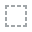
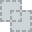
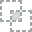
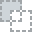
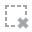
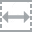
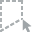
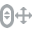
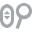
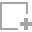
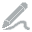
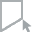
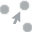
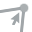
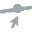

In [583]:
from IPython.display import HTML

# Assuming 'example.html' is your HTML file
with open('/Users/praharshpranjal/Desktop/\dashboard.html', 'r') as file:
    html_content = file.read()

# Display the HTML content in the notebook
HTML(html_content)



In [ ]:
/Users/praharshpranjal/Desktop/

In [ ]:
, tiles= tilesCustom,attr='Mapbox'